## Student Performance Predictor

In [201]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [203]:
data = pd.read_csv("student-mat.csv", sep=";")

In [205]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [207]:
predict = "G3"

In [209]:
data = data[[ "G1", "G2", "G3", "studytime", "health", "famrel", "failures", "absences"]]

In [211]:
x = np.array(data.drop(columns=[predict]))
y = np.array(data[predict])

In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [215]:
print(x_train.shape, x_test.shape, y_test.shape, y_test.shape)

(355, 7) (40, 7) (40,) (40,)


In [217]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print("Accuracy (R-squared):", acc)

Accuracy (R-squared): 0.9017435275994237


In [149]:
print('Coefficient (weights for each feature): \n', linear.coef_)
print('Intercept (the starting value): \n', linear.intercept_)

Coefficient (weights for each feature): 
 [ 0.12835497  0.99995552 -0.1420485   0.04319949  0.33700552 -0.10713176
  0.03399401]
Intercept (the starting value): 
 -2.9914533960498346


In [151]:
predictions = linear.predict(x_test)

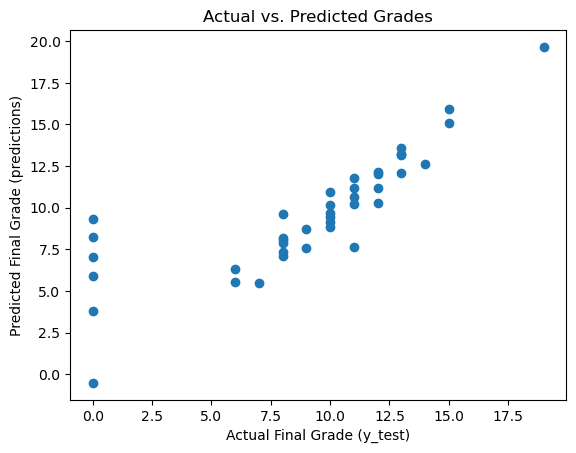

In [153]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Final Grade (y_test)")
plt.ylabel("Predicted Final Grade (predictions)")
plt.title("Actual vs. Predicted Grades")
plt.show()

In [129]:
# print("--- Student Performance Predictor ---")
print("Please enter the following information:")

g1 = int(input("First period grade (G1) (0-20): "))
g2 = int(input("Second period grade (G2) (0-20): "))
studytime = int(input("Weekly study time (1-4): "))
health = int(input("Current health status (1-5): "))
famrel = int(input("Quality of family relationships (1-5): "))
failures = int(input("Number of past class failures (0-4): "))
absences = int(input("Number of school absences (0-93): "))

user_data = np.array([[g1, g2, studytime, health, famrel, failures, absences]])
predicted_score = linear.predict(user_data)

print("---------------------------------")
print(f"Predicted Final Score (G3): {predicted_score[0]:.2f}") 

if predicted_score[0] >= 10:
    print("Prediction: You will PASS!")
else:
    print("Prediction: You are at risk of FAILING.")

Please enter the following information:


First period grade (G1) (0-20):  14
Second period grade (G2) (0-20):  16
Weekly study time (1-4):  2
Current health status (1-5):  3
Quality of family relationships (1-5):  5
Number of past class failures (0-4):  0
Number of school absences (0-93):  23


---------------------------------
Predicted Final Score (G3): 17.10
Prediction: You will PASS!
